In [1]:
import trimesh

scene = trimesh.Scene()

In [9]:
import pyshot
import numpy as np

### ...

mesh_template = trimesh.load("/home/s94zalek_hpc/shape_matching/data/SURREAL_full/template/remeshed/template.off", validate=True)
mesh_partial = trimesh.load("/home/s94zalek_hpc/shape_matching/data/SHREC16_test/holes/off/holes_david_shape_10.off", validate=True)

# center each mesh
mesh_template.vertices -= mesh_template.centroid
mesh_partial.vertices -= mesh_partial.centroid

# normalize the face area
mesh_template.vertices /= np.sqrt(mesh_template.area_faces.sum())
mesh_partial.vertices /= np.sqrt(mesh_partial.area_faces.sum())

# fix the orientation of the partial mesh
verts_partial_raw = np.array(mesh_partial.vertices)

verts_partial = np.zeros((verts_partial_raw.shape[0], 3))
verts_partial[:, 0] = verts_partial_raw[:, 0]
verts_partial[:, 1] = verts_partial_raw[:, 2]
verts_partial[:, 2] = -verts_partial_raw[:, 1]

mesh_partial.vertices = verts_partial + np.array([1, 0, 0])


# a np.array of shape (n, n_descr)
shot_descrs_template = pyshot.get_descriptors(
	np.array(mesh_template.vertices),
	np.array(mesh_template.faces),
	radius=100,
	local_rf_radius=100,
	# The following parameters are optional
	min_neighbors=3,
	n_bins=10,
	double_volumes_sectors=True,
	use_interpolation=True,
	use_normalization=True,
)

shot_descrs_partial = pyshot.get_descriptors(
	np.array(mesh_partial.vertices),
	np.array(mesh_partial.faces),
	radius=100,
	local_rf_radius=100,
	# The following parameters are optional
	min_neighbors=3,
	n_bins=10,
	double_volumes_sectors=True,
	use_interpolation=True,
	use_normalization=True,
)

In [ ]:
scene.geometry.clear()

descr_idx = 20

cmap_template = trimesh.visual.color.interpolate(shot_descrs_template[:, descr_idx], 'jet')
mesh_template.visual.vertex_colors = cmap_template

cmap_partial = trimesh.visual.color.interpolate(shot_descrs_partial[:, descr_idx], 'jet')
mesh_partial.visual.vertex_colors = cmap_partial

scene.add_geometry(mesh_template)
scene.add_geometry(mesh_partial)

scene.show()

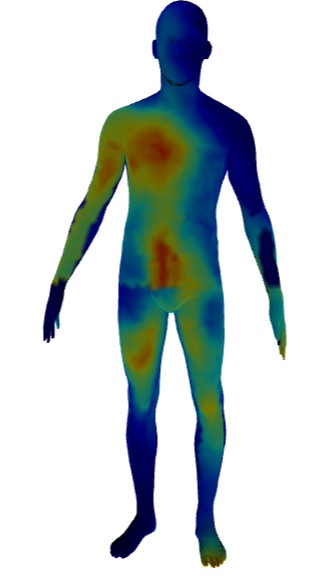

In [ ]:
import torch

scene.geometry.clear()

mesh_idx = 0

mesh_aug = trimesh.load(f"/lustre/mlnvme/data/s94zalek_hpc-shape_matching/data_sign_training/train/partial_anisRemesh_shot/off/{mesh_idx:04}.off")
shot_aug = torch.load(f"/lustre/mlnvme/data/s94zalek_hpc-shape_matching/data_sign_training/train/partial_anisRemesh_shot/shot/{mesh_idx:04}.pt")

descr_idx = 20

cmap_aug = trimesh.visual.color.interpolate(shot_aug[:, descr_idx], 'jet')
mesh_aug.visual.vertex_colors = cmap_aug

scene.add_geometry(mesh_aug)

scene.show()

In [ ]:
shot_aug.shape

In [10]:
shot_descrs_partial.shape

In [18]:
import matplotlib.pyplot as plt

# plot the first 10 descriptors

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for i in range(0, 10, 1):
    axs[0].plot(shot_descrs_template[:, i], label=f"descr {i}", alpha=0.2)
    axs[1].plot(shot_descrs_partial[:, i], label=f"descr {i}", alpha=0.2)
    
axs[0].legend()
axs[1].legend()

plt.show()
    